## Analysis on how education expenditure changed with other macro economic variables

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
# set working directory
import os
os.chdir('E:\\MSC\\MSc in Data Science\\S1 Data Science\\Assignment\\Group project')

In [3]:
# import data
data1 = pd.read_csv('Education_Expenditure_Data.csv')
data1.head(n=12)

,Item,Total Schools,Government Schools,o/w National Schools,Other Schools,Private,Pirivenas,Total Students,Government Schools,Other Schools,...,Total Expenditure on Education (Rs. Mn) (e),Current Expenditure,Capital Expenditure,Expenditure as a % of GDP,University Education,Universities (No.),Students (No.) (g),Lecturers (No.),Number Graduating,New Admissions for Basic Degrees (No.)
0,2000,10615,9976,317,639,78,561,4340412,4193908,146504,...,30929,23794,7135,2.46,NaN,13,48296,3241,9374,11805
1,2001,10552,9891,320,661,78,583,4337258,4187146,150112,...,28283,23448,4835,2.01,NaN,13,48212,3268,8896,11962
2,2002,10508,9829,323,679,80,599,4179217,4027075,152142,...,37209,31161,6048,2.35,NaN,13,48666,3390,9027,12144
3,2003,10473,9790,323,683,85,598,4098465,3941685,156780,...,39116,31673,7443,2.15,NaN,13,64291,3543,10730,25471
4,2004,10501,9765,324,736,85,651,4028186,3870628,157558,...,42340,33792,8548,2.03,NaN,13,64801,3725,10525,13396
5,2005,10461,9723,324,738,85,653,4103512,3942077,161435,...,63557,50697,12860,2.59,NaN,15,66386,3875,7154,14520
6,2006,10461,9714,327,747,93,654,4000714,3837548,163166,...,78344,61144,17200,2.67,NaN,15,65206,4016,11713,16585
7,2007,10430,9678,328,752,94,658,4111022,3942185,168837,...,92540,72592,19948,2.59,NaN,15,66996,4304,12005,17196
8,2008,10445,9662,330,783,92,691,4101509,3930374,171135,...,100083,77141,22942,2.27,NaN,15,66891,4452,12958,20069
9,2009,10205,9410,334,795,98,697,4037896,3864824,173072,...,100506,82414,18092,2.08,NaN,15,68768,4735,13952,20846


In [4]:
# import data
data2 = pd.read_csv('Macro_variables_updated.csv')
data2.head(n=5)

,Year,CPI,Education_Expenditure,GDP
0,2003,107.9,39116,1819348.837
1,2004,114.1,42340,2085714.286
2,2005,119.7,63557,2453938.224
3,2006,126.3,78344,2934232.210
4,2007,133.7,92540,3572972.973


## Descriptives

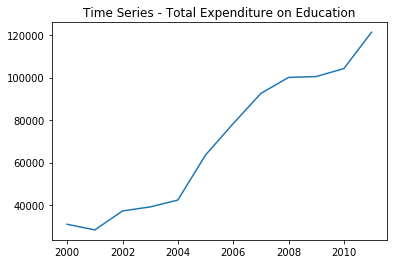

In [9]:
plt.plot('Year', 'Education_Expenditure', data=data2)
plt.title('Time Series - Total Expenditure on Education')
plt.show()

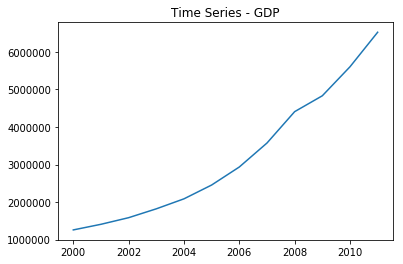

In [10]:
plt.plot('Year', 'GDP', data=data2)
plt.title('Time Series - GDP')
plt.show()

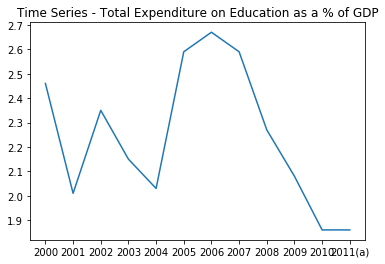

In [11]:
plt.plot('Item', 'Expenditure as a % of GDP', data=data1)
plt.title('Time Series - Total Expenditure on Education as a % of GDP')
plt.show()

## Regression Models

In [8]:
import statsmodels.api as sm # import statsmodels 

# macro variables
for v in ['CPI','GDP']:
    X = data2[v] ## X usually means our input variables (or independent variables)
    y = data2['Education_Expenditure'] ## Y usually means our output/dependent variable
    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model


    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    # Print out the statistics
    print('\n------- Dependent Variable: {}-----\n'.format(v),model.summary(),'\n','\n','\n')


------- Dependent Variable: CPI-----
                               OLS Regression Results                             
Dep. Variable:     Education_Expenditure   R-squared:                       0.488
Model:                               OLS   Adj. R-squared:                  0.415
Method:                    Least Squares   F-statistic:                     6.677
Date:                   Fri, 22 Mar 2019   Prob (F-statistic):             0.0363
Time:                           10:43:31   Log-Likelihood:                -101.61
No. Observations:                      9   AIC:                             207.2
Df Residuals:                          7   BIC:                             207.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


## Time Series Models

In [5]:

for v in ['CPI','GDP']:
    
    import statsmodels.api as sm
    model = sm.tsa.ARIMA(endog=data2['Education_Expenditure'].astype('float64'), exog=data2[[v]].astype('float64'),
                                 order = (0,0,1))
    model_fit = model.fit()
    print('\n------- Dependent Variable: {}-----\n'.format('Education_Expenditure'),model_fit.summary(),'\n','\n','\n')

E:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)



------- Dependent Variable: Education_Expenditure-----
                                 ARMA Model Results                               
Dep. Variable:     Education_Expenditure   No. Observations:                    9
Model:                        ARMA(0, 1)   Log Likelihood                 -99.217
Method:                          css-mle   S.D. of innovations          13059.194
Date:                   Sat, 23 Mar 2019   AIC                            206.434
Time:                           07:51:04   BIC                            207.223
Sample:                                0   HQIC                           204.731
                                                                                 
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -3.016e+04   5.62e+04     -0.537      0.611    -1.4e+05    7.99e+04

E:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
